<a href="https://colab.research.google.com/github/SUYAMBULAKSHMI-VENKATESAN/DAMAKA/blob/main/Segmentation_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1542 - loss: 0.7178
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.1794 - loss: 0.6972
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.8201 - loss: 0.6877
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


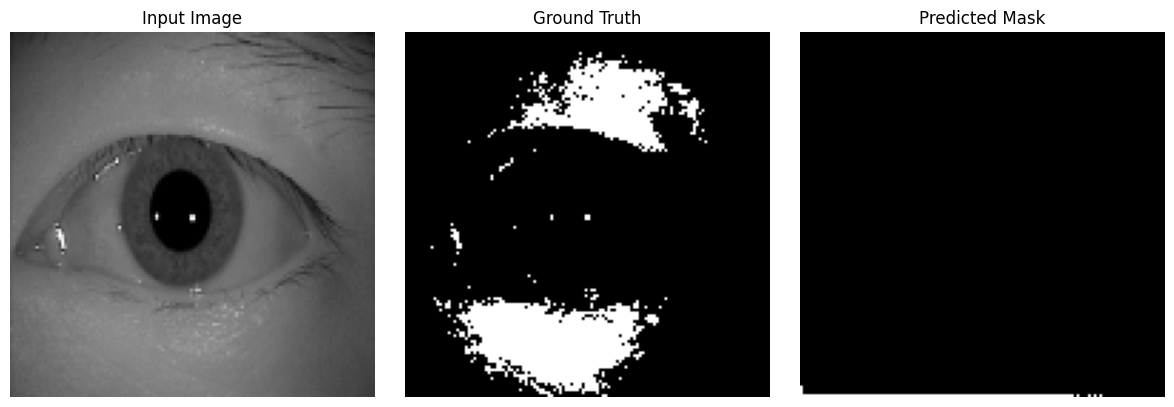

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


def build_unet(input_size=(128, 128, 1)):
    inputs = Input(input_size)
    c1 = Conv2D(16, 3, activation='relu', padding='same')(inputs)
    c1 = Conv2D(16, 3, activation='relu', padding='same')(c1)
    p1 = MaxPooling2D()(c1)

    c2 = Conv2D(32, 3, activation='relu', padding='same')(p1)
    c2 = Conv2D(32, 3, activation='relu', padding='same')(c2)
    p2 = MaxPooling2D()(c2)

    c3 = Conv2D(64, 3, activation='relu', padding='same')(p2)
    c3 = Conv2D(64, 3, activation='relu', padding='same')(c3)

    u1 = UpSampling2D()(c3)
    u1 = concatenate([u1, c2])
    c4 = Conv2D(32, 3, activation='relu', padding='same')(u1)
    c4 = Conv2D(32, 3, activation='relu', padding='same')(c4)

    u2 = UpSampling2D()(c4)
    u2 = concatenate([u2, c1])
    c5 = Conv2D(16, 3, activation='relu', padding='same')(u2)
    c5 = Conv2D(16, 3, activation='relu', padding='same')(c5)

    outputs = Conv2D(1, 1, activation='sigmoid')(c5)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


def apply_unet_segmentation(image_path):
    # Load and resize image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    image = cv2.resize(image, (128, 128))
    image_norm = image / 255.0
    image_input = image_norm.reshape((1, 128, 128, 1))

    # Generate pseudo-label using threshold (for demonstration)
    mask = (image_norm > 0.5).astype(np.uint8).reshape((128, 128, 1))
    mask_input = mask.reshape((1, 128, 128, 1))

    # Build and train U-Net model (very quick train for demo)
    model = build_unet()
    model.fit(image_input, mask_input, epochs=3, verbose=1)

    # Predict mask
    pred_mask = model.predict(image_input)[0, :, :, 0]

    # Show results
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Input Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask[:, :, 0], cmap='gray')
    plt.title("Ground Truth")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask > 0.5, cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return pred_mask

# Example usage:
prediction = apply_unet_segmentation("/content/S6000S00.jpg")